<a href="https://colab.research.google.com/github/Pratham3301/Iris-Classification/blob/main/IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
# Load necessary libraries
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to a DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['target'] = y

# Display the first few rows of the dataset
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
df.to_csv('Iris.csv')


In [46]:
print(df.columns)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')


In [47]:
df.groupby('target').mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


In [48]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [49]:
# Standardize the features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
# Train the SVM classifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svm = SVC(kernel='linear')
svm.fit(X_train, y_train)

# Predict and evaluate SVM
y_pred_svm = svm.predict(X_test)
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


SVM Model Accuracy: 0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



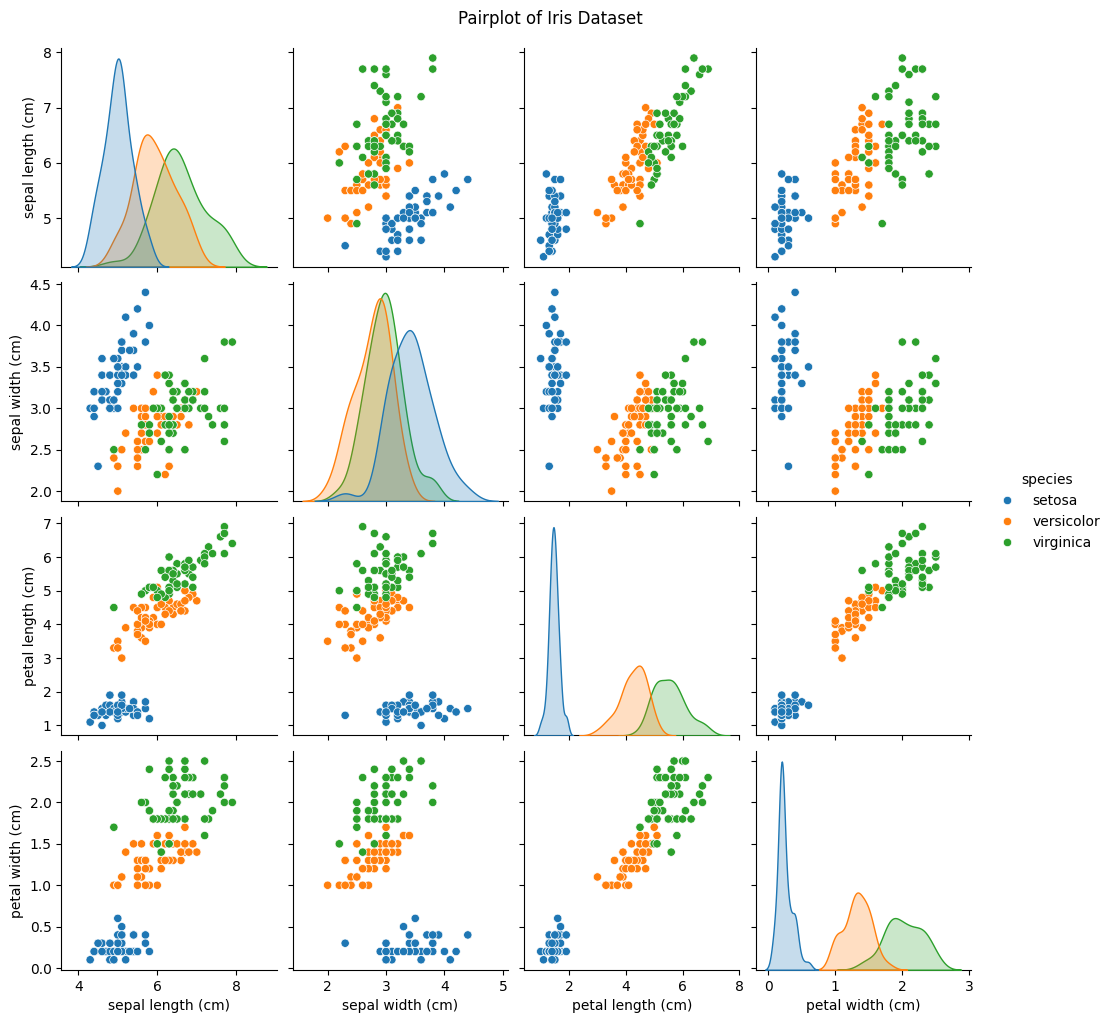

In [51]:
# Visualizing the Iris dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Convert to DataFrame for easier manipulation
df = pd.DataFrame(data=X, columns=iris.feature_names)
df['species'] = iris.target

# Map target values to species names for better visualization
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species'] = df['species'].map(species_map)

# Pairplot
sns.pairplot(df, hue='species')
plt.suptitle('Pairplot of Iris Dataset', y=1.02)
plt.show()


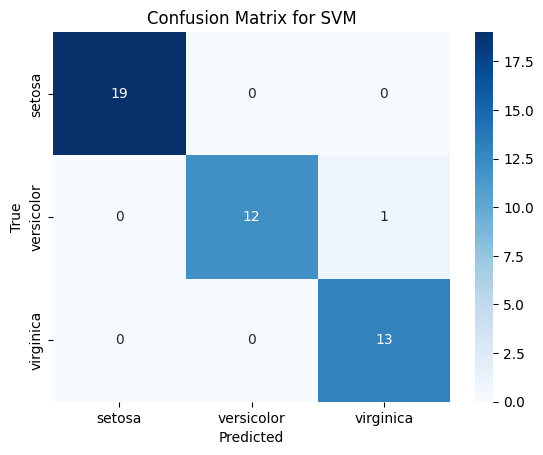

In [52]:
# Function to plot confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=species_map.values(), yticklabels=species_map.values())
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Plot confusion matrix for SVM
plot_confusion_matrix(y_test, y_pred_svm, "Confusion Matrix for SVM")




In [53]:
# Import TensorFlow libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network
model = Sequential()
model.add(Dense(10, input_shape=(4,), activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=5, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print("TensorFlow Model Accuracy:", accuracy)


Epoch 1/50
17/17 [==============================] - 1s 21ms/step - loss: 1.0352 - accuracy: 0.3929 - val_loss: 1.0253 - val_accuracy: 0.3810
Epoch 2/50
17/17 [==============================] - 0s 8ms/step - loss: 0.9732 - accuracy: 0.5595 - val_loss: 0.9761 - val_accuracy: 0.4762
Epoch 3/50
17/17 [==============================] - 0s 7ms/step - loss: 0.9204 - accuracy: 0.6429 - val_loss: 0.9255 - val_accuracy: 0.8571
Epoch 4/50
17/17 [==============================] - 0s 10ms/step - loss: 0.8660 - accuracy: 0.7619 - val_loss: 0.8799 - val_accuracy: 0.8571
Epoch 5/50
17/17 [==============================] - 0s 6ms/step - loss: 0.8122 - accuracy: 0.7738 - val_loss: 0.8328 - val_accuracy: 0.8571
Epoch 6/50
17/17 [==============================] - 0s 4ms/step - loss: 0.7596 - accuracy: 0.7976 - val_loss: 0.7832 - val_accuracy: 0.8571
Epoch 7/50
17/17 [==============================] - 0s 5ms/step - loss: 0.7031 - accuracy: 0.8214 - val_loss: 0.7349 - val_accuracy: 0.8571
Epoch 8/50
17/17 [

2/2 [==============================] - 0s 5ms/step


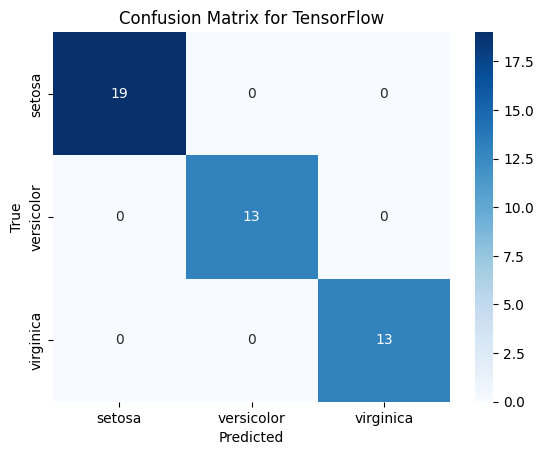

In [54]:
# Predict using TensorFlow model
y_pred_tf = model.predict(X_test)
y_pred_tf = y_pred_tf.argmax(axis=1)

# Plot confusion matrix for TensorFlow model
plot_confusion_matrix(y_test, y_pred_tf, "Confusion Matrix for TensorFlow")

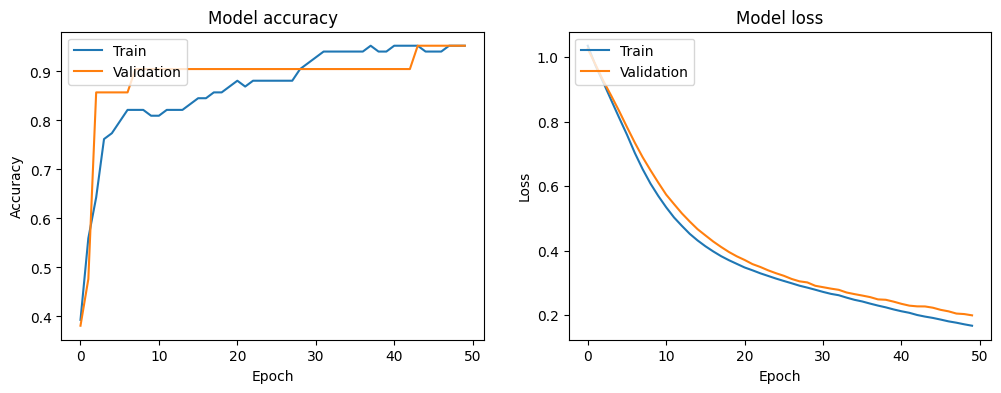

In [55]:
# Plot loss and accuracy curves for TensorFlow model training
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

plot_history(history)


In [56]:
# Compare the results of SVM and TensorFlow models
print("Comparison of Model Accuracies:")
print("SVM Model Accuracy:", accuracy_score(y_test, y_pred_svm))
print("TensorFlow Model Accuracy:", accuracy)


Comparison of Model Accuracies:
SVM Model Accuracy: 0.9777777777777777
TensorFlow Model Accuracy: 1.0
